## What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information:

Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality (score between 0 and 10)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# loading dataset
df = pd.read_csv('winequality-red.csv')

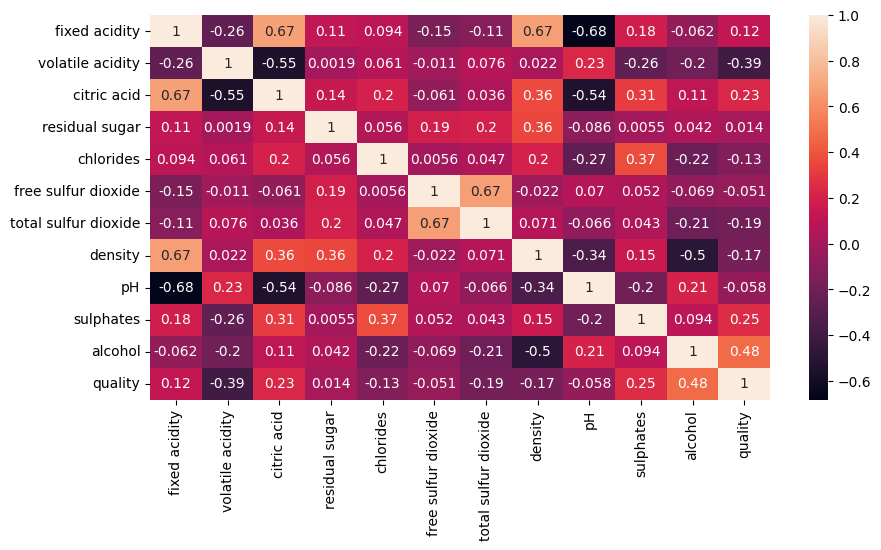

In [4]:
# plotting heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot= True)
plt.show()

#### Based on the correlation with the quality of wine the importance of each feature will be in below order.
##### positively correlated
1. alcohol
2. sulphates
3. citric acid
4. fixed acidity

#### negatively correlated
1. volatile acidity
2. totol sulfur dioxide
3. density
4. chloride

#### least correlated
1. pH
2. free sulphur dioxide
3. residual sugar




## How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

In [10]:
# checking missing values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**No missing value**

#### Advantages and Disadvantages of the All techniques
##### 1. Mean Value Imputation
> Advantages:
1. Simple and easy to implement.
2. Preserves the mean of the data, which is important in some applications.
3. Can work well if the missing data is missing at random (MAR).
> Disadvantages:
1. Can introduce bias into the data if the missing data is not missing at random (NMAR).
2. Can result in unrealistic or invalid values if the distribution of the data is not normal.
##### 2. Median Value Imputation:
> Advantages:
1. Simple and easy to implement.
2. Robust to outliers.
3. Can work well if the missing data is NMAR.
> Disadvantages:
1. Can result in a loss of information if the distribution of the data is not symmetrical.
2. May not be suitable for continuous data with a wide range of values.
##### 3. Mode Value Imputation:
> Advantages:
1. Simple and easy to implement.
2. Suitable for categorical data.
3. Can work well if the missing data is MAR.
> Disadvantages:
1. May not be suitable for continuous data. it is used for categoricsl dataset.

Can result in a loss of information if there are multiple modes.

## What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Statistical Analysis 

In [22]:
df.describe()

,math_score,reading_score,writing_score,total_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


### Visualization

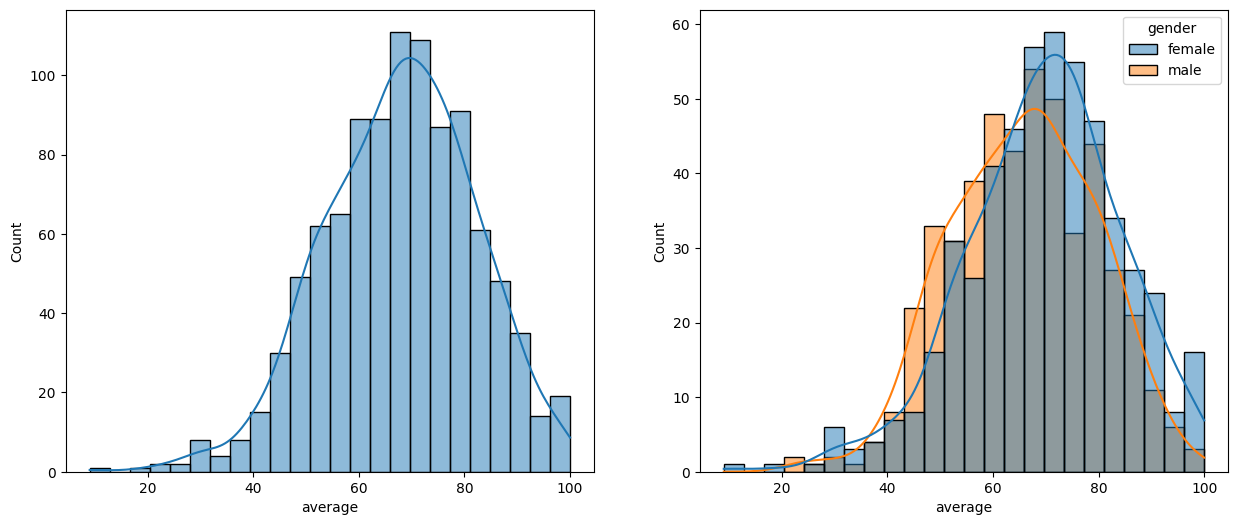

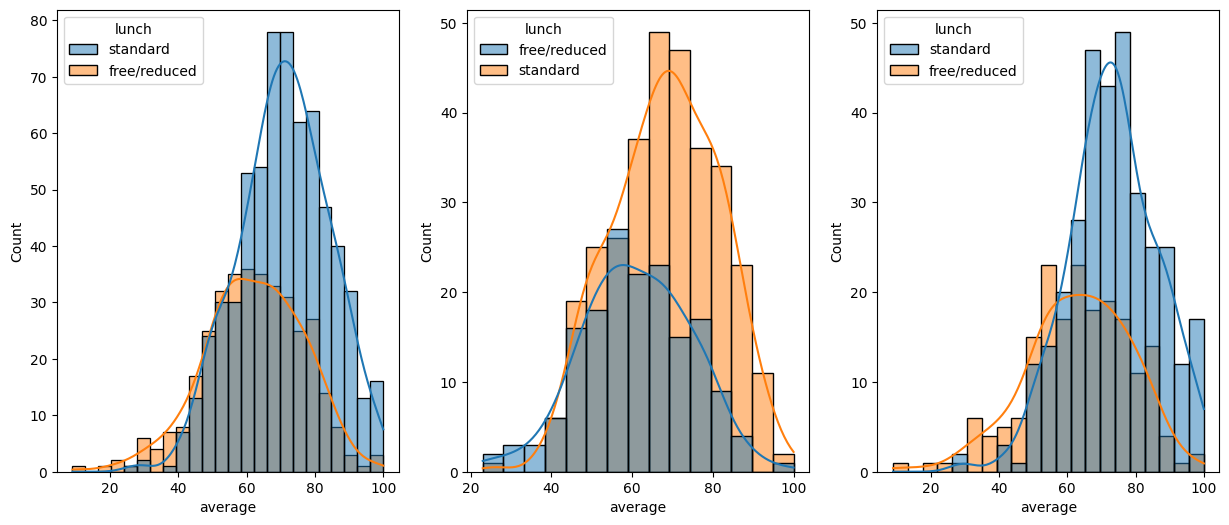

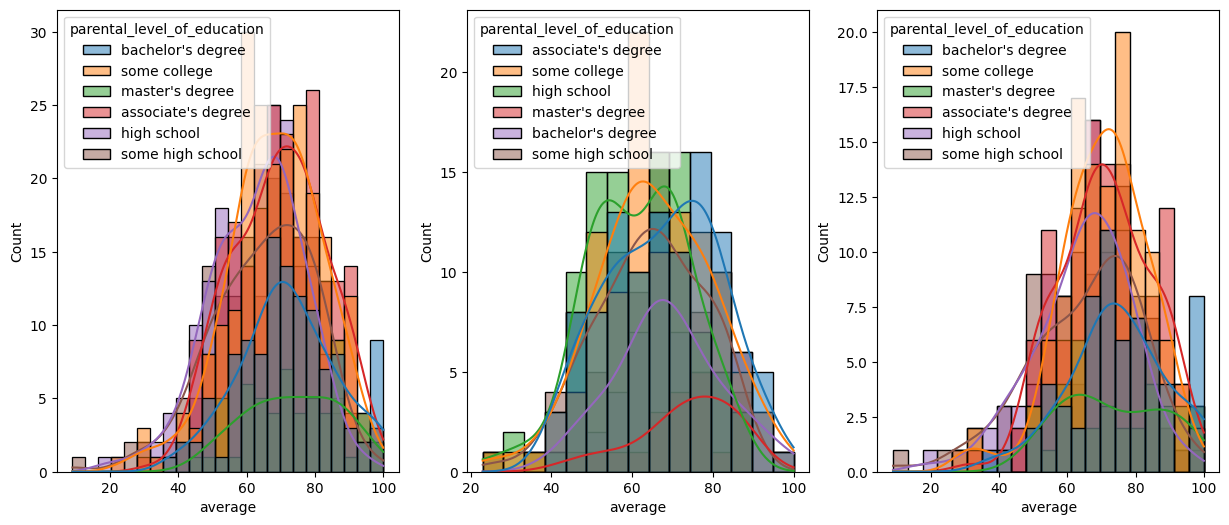

In [21]:
plt.subplots(2,1,figsize=(15,6))
plt.subplot(121)
sns.histplot(data = df, x= 'average', kde=True)
plt.subplot(122)
sns.histplot(data = df, x= 'average', kde=True, hue='gender')
plt.show()

## Effect of the lunch
plt.subplots(3,1,figsize=(15,6))
plt.subplot(131)
sns.histplot(data = df, x= 'average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data = df[df['gender']=='male'], x= 'average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data = df[df['gender']=='female'], x= 'average', kde=True, hue='lunch')
plt.show()

## Effect of the Parental Education
plt.subplots(3,1,figsize=(15,6))
plt.subplot(131)
sns.histplot(data = df, x= 'average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df['gender']=='male'], x= 'average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data = df[df['gender']=='female'], x= 'average', kde=True, hue='parental_level_of_education')
plt.show()


#### Key Factors after Evaluation
##### Observation (Which Effect Student Performance )
- Female students perform well. as compared to male
- Students who took Standar food Score more marks in the Exam
##### Parent Education
- Parents who are educated (associated master and bachelore degree ) their Students Perofrm well as Comapared to Other.

## Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

#### Process of feature engineering in the context of the student performance data set:

1. Understand the problem and the data
2. Data cleaning and preprocessing
3. Feature selection
4. Feature extraction
5. Feature transformation

Since we analyzed the problem statement and cleaned the data we're gonna transform the categorical features to numerical through different techniques.


In [29]:
# Ordinal encoding for praental level of education

df['parental_level_of_education'] = df['parental_level_of_education'].map({"bachelor's degree":3, 'some college':1, "master's degree":4,"associate's degree":2, 'high school':0, 'some high school':0})

In [31]:
#Onehot encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [36]:
encodata = encoder.fit_transform(df[['gender', 'race_ethnicity' , 'lunch' , 'test_preparation_course']]).toarray()

encodf = pd.DataFrame(encodata, columns=encoder.get_feature_names_out())

final_df = pd.concat([df, encodf], axis=1)

final_df.drop(columns=['gender', 'race_ethnicity' , 'lunch' , 'test_preparation_course'], inplace=True)

In [47]:
final_df.head()

,parental_level_of_education,math_score,reading_score,writing_score,total_score,average,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,3,72,72,74,218,72.666667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,69,90,88,247,82.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,4,90,95,93,278,92.666667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2,47,57,44,148,49.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,76,78,75,229,76.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [49]:
df = pd.read_csv('winequality-red.csv')

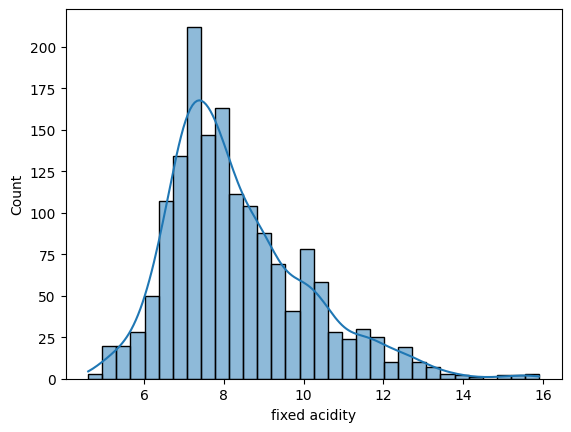

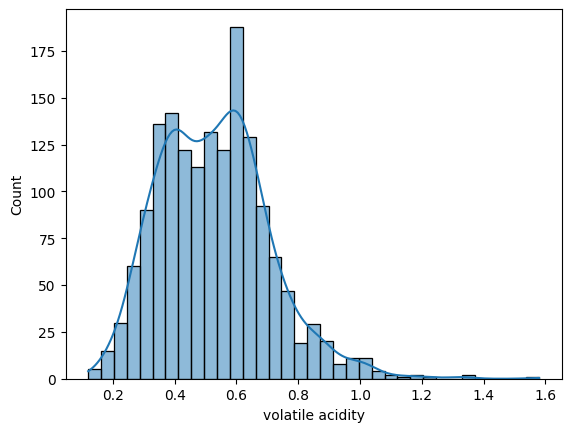

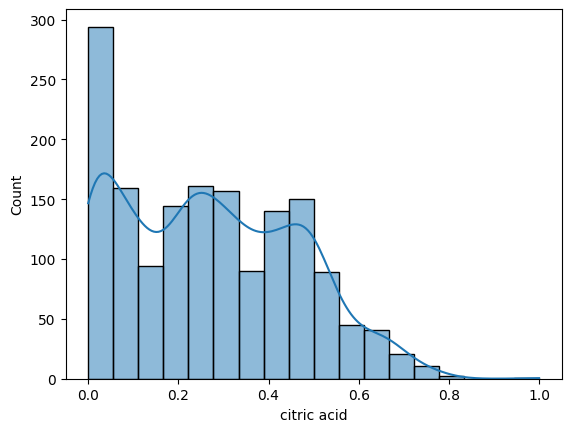

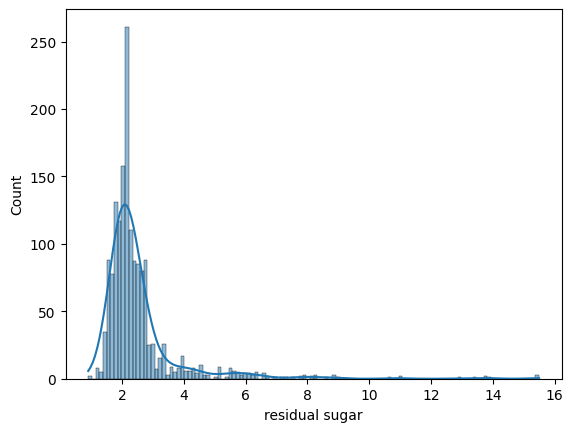

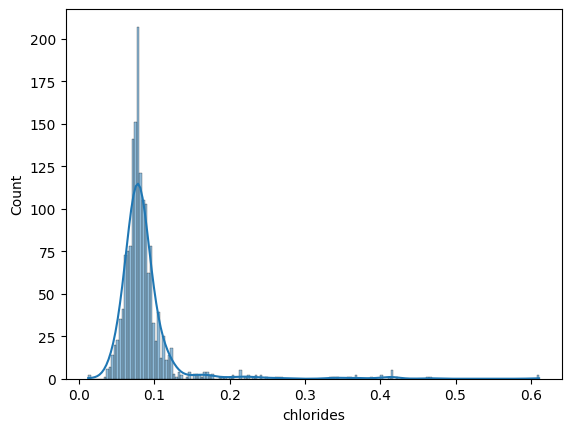

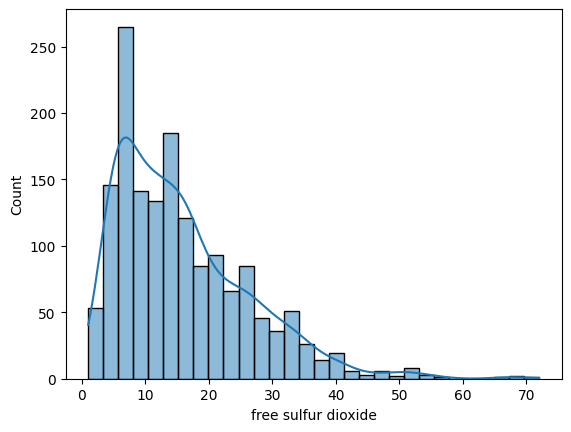

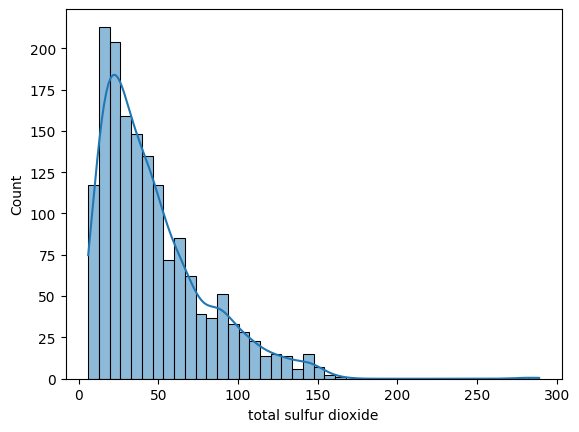

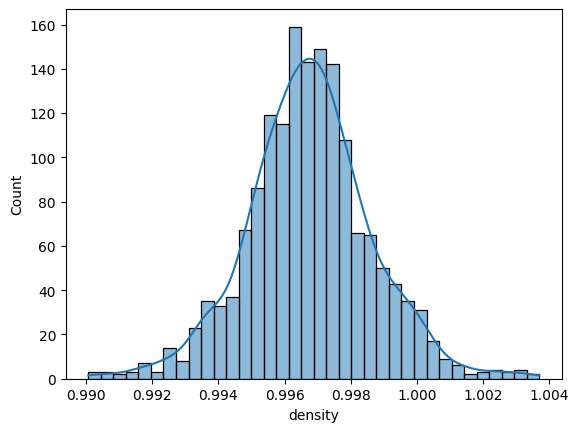

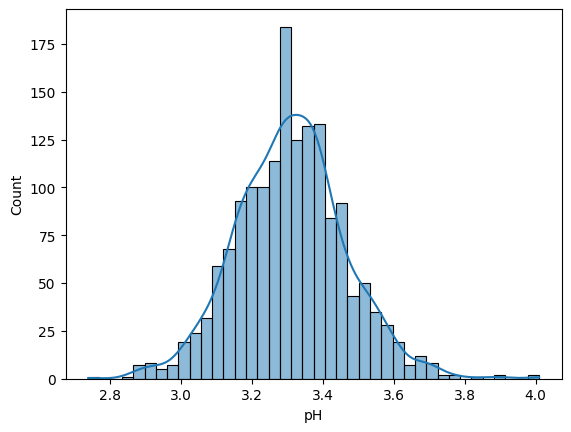

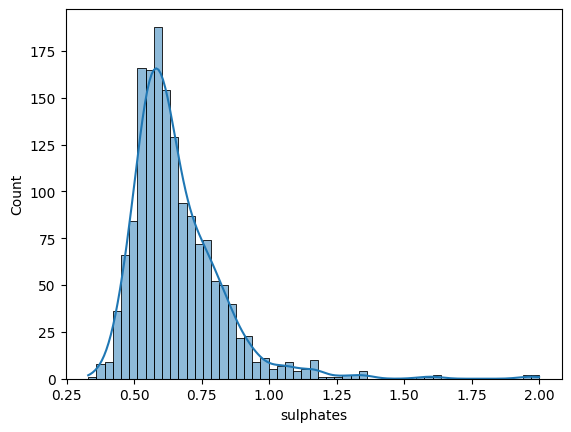

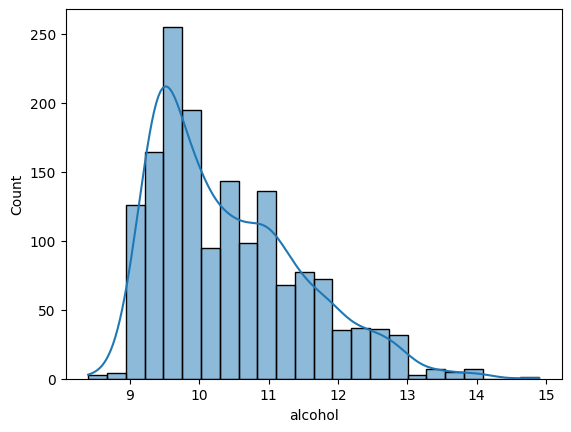

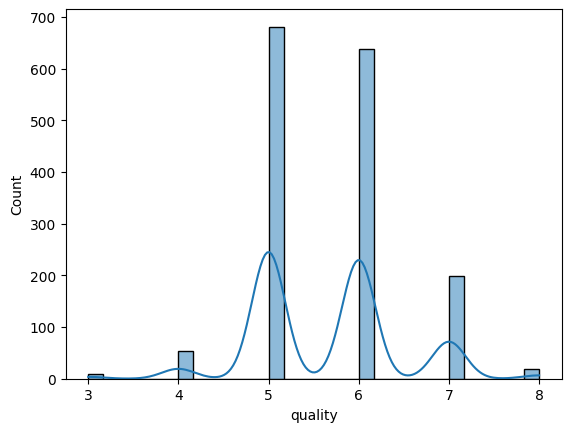

In [51]:
for i in df.columns:
    sns.histplot(data= df, x=i, kde= True)
    plt.show()

#### The Following feature(s) exhibit non-normality
- Volatile Acidity
- Citric Acid
- Residual Sugar
- Chlorides
- Free sulphur dioxide
- total sulphur dioxide
- Alcohol
- Sulphates


#### To improve normality for non-normally distributed features, there are several transformations that can be applied
##### Logarithmic transformation:
- This is commonly used for right-skewed data, where large values occur less frequently. Taking the logarithm of these values can help to spread out the data and make it more normally distributed.

##### Square root transformation:
- This can be used for data that are positively skewed but not as severely as with a logarithmic transformation

##### Box-Cox transformation:
- This is a more general transformation that can be used for both positively and negatively skewed data. It involves raising the data to a power (lambda) that is chosen to make the transformed data more normally distributed.

##### Reciprocal transformation:
- This can be used for data that are heavily skewed towards small values. Taking the reciprocal of the data can help to spread out the values and make the distribution more normal.

##### Exponential transformation:
- This can be used for data that are negatively skewed, where small values occur less frequently. Taking the exponential of these values can help to spread out the data and make it more normally distributed.

## Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load dataset
df = pd.read_csv('winequality-red.csv')

x= df.drop(columns=['quality'])
y=df['quality']

In [3]:
# scale features
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [5]:
# pca
pca = PCA()
pca.fit(scaled)

PCA()

In [68]:
# variance 
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print(num_components)

7


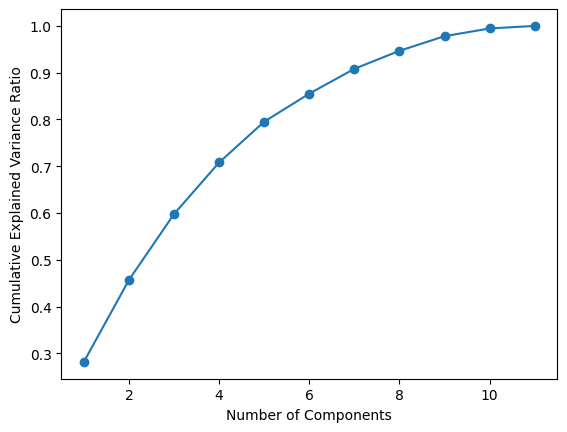

In [76]:
plt.plot(range(1,len(cumulative_variance_ratio)+1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

This will show a graph with the cumulative explained variance ratio for each number of components. The elbow point on the graph indicates the minimum number of components required to explain a significant portion of the variance in the data. In this case, we can see that the elbow point is at around 7 components, confirming our previous analysis.

 ### Method

- First, we scale the data using standard scaler . 
- Then we instantiate a PCA object and fit the model to the data using the fit() method. 
- We calculate the cumulative explained variance using the explained_variance_ratio_ attribute and the cumsum() function from NumPy. 
- We determine the number of principal components needed to explain at least 90% of the variance by finding the index of the first element in the cumulative variance array that is greater than or equal to 0.9. 
- We add 1 to this index because Python indexes start at 0, and we need to account for the first principal component. 
- Finally, we fit the PCA model with the specified number of components and transform the data using the transform() method.